# 実践ロボット制御

## 平面二自由度
### 順運動学
関節の変位から手先の位置を求める
***
$
P(t)=\begin{bmatrix}p_{x}(t) \\p_{y}(t) \end{bmatrix}=\begin{bmatrix}l_{1}C_{1}+l_{2}C_{12}\\l_{1}S_{1}+l_{2}S_{12} \end{bmatrix}
$
***
### 逆運動学
手先の位置が与えられたときに、それを実現するための関節変位を求める
***
順運動学の式の一行目の式と二行目の式の二乗の和をとって

$
\begin{eqnarray*}p_{x}(t)^2+p_{y}(t)^2&=&l_{1}^2+l_{2}^2+2l_{1}l_{2}(C_{1}C_{12}+S_{1}S_{12})
\\\\\mbox{加法定理を使って}\\&=&l_{1^2}+l_{2}^2+2l_{1}l_{2}C_{2}
\\\\C_{2}&=&\frac{p_{x}(t)^2+p_{y}(t)^2-l_{1}^2-l_{2}^2}{2l_{1}l_{2}}\end{eqnarray*}
$

***

[[-7.5       ]
 [ 4.33012702]]
-2.499999999999999 -7.499999999999999 4.330127018922194 4.330127018922195


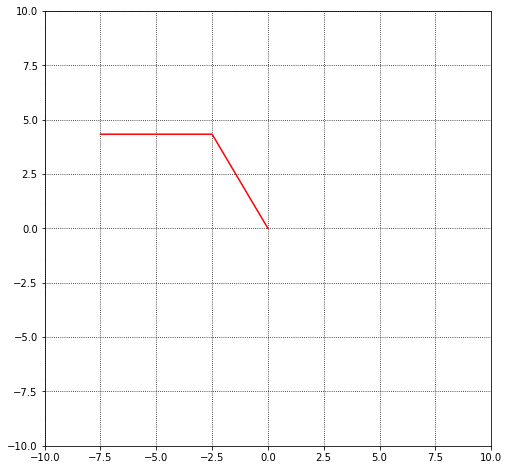

In [18]:
#平面二自由度
import numpy as np
import math
import matplotlib.pyplot as plt

l1 = 5   # 第一関節の長さ
l2 = 5   # 第二関節の長さ
d1 = 120 # 第一関節の角度
d2 = 60  # 第二関節の角度

#順運動学
p = np.matrix([[l1*math.cos(math.radians(d1)) + l2 *
              (math.cos(math.radians(d1)) * math.cos(math.radians(d2)) - math.sin(math.radians(d1)) * math.sin(math.radians(d2)))],
               [l1*math.sin(math.radians(d1)) + l2 *
            (math.sin(math.radians(d1)) * math.cos(math.radians(d2)) + math.cos(math.radians(d1)) * math.sin(math.radians(d2)))]])

print(p)

x1 = l1 * math.cos(math.radians(d1))
y1 = l1 * math.sin(math.radians(d1))
x2 = p[0, 0]
y2 = p[1, 0]

print(x1, x2, y1, y2)

x = [0, x1, x2]
y = [0, y1, y2]


plt.figure(figsize=(8, 8))
plt.plot(x, y, color="red")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(which='major',color='black',linestyle=':')

plt.show()


#逆運動学
px = 10 #手先座標
py = 0  #手先座標
l1 = 5  #第一関節の長さ
l2 = 5  #第二関節の長さ

#d2 = math.degrees(math.acos(px ** 2 + py ** 2 - l1 ** 2 -l2 ** 2 /(2 * l1 * l2)))

#q = np.matrix([[l1 + l2 * math.cos(math.radians(d2)), l2 * math.sin(math.radians(d2))],
#              [-l2 * math.sin(math.radians(d2)), l1+ l2 * math.cos(math.radians(d2))]])

#p = np.matrix([[px], [py]])

#r = np.dot(q, p)
#c1 = r[0, 0] / (l1 ** 2 + l2 ** 2 + 2 * l1 * l2 * math.cos(math.radians(d2)))
#s1 = r[0, 1] / (l1 ** 2 + l2 ** 2 + 2 * l1 * l2 * math.cos(math.radians(d2)))

#d1 = math.atan2(s1, c2)